In [ ]:
# If you want to update repository (re-download)
!rm -r DeepImageInpainting

In [ ]:
!git clone https://github.com/Nagim123/DeepImageInpainting.git

Cloning into 'DeepImageInpainting'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 178 (delta 78), reused 127 (delta 34), pack-reused 0
Receiving objects: 100% (178/178), 31.56 MiB | 27.02 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [ ]:
!python DeepImageInpainting/src/data/create_dataset_cifar_10.py

2023-10-01 20:37:02.167279: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 20:37:04.806142: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
CIFAR10 dataset is created and saved in datasets\cifar10.pt


In [ ]:
!python DeepImageInpainting/src/data/show_image.py cifar10.pt

Saved to temp/temp.png!


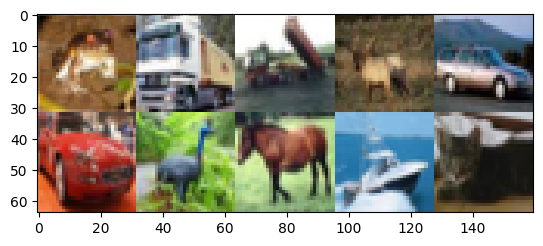

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open('DeepImageInpainting/src/data/temp/temp.png'))

In [ ]:
!python DeepImageInpainting/src/data/show_image.py cifar10.pt --masked

Saved to temp/temp.png!


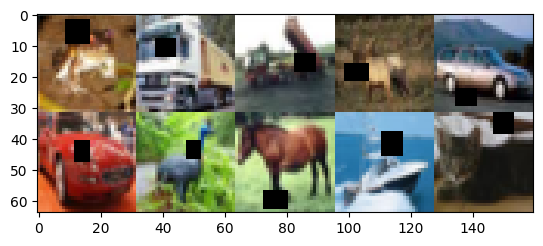

In [ ]:
plt.imshow(Image.open('DeepImageInpainting/src/data/temp/temp.png'))

In [ ]:
!python DeepImageInpainting/src/train_model.py vanilla_ae cifar10.pt 10 BCELoss

/content/DeepImageInpainting/src/train_model.py:63: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(f"Model {args.model_name} is not enough. Training current one from scratch!")
100% 1313/1313 [02:13<00:00,  9.82it/s, loss=0.589]
100% 563/563 [00:22<00:00, 24.74it/s, e_loss=0.574]
Epoch 0 train_loss:0.5867744594789696, val_loss:0.5735678813597237
100% 1313/1313 [02:14<00:00,  9.73it/s, loss=0.581]
100% 563/563 [00:22<00:00, 25.36it/s, e_loss=0.552]
Epoch 1 train_loss:0.5702396118722612, val_loss:0.5667954519205788
100% 1313/1313 [02:31<00:00,  8.65it/s, loss=0.577]
100% 563/563 [00:22<00:00, 24.68it/s, e_loss=0.568]
Epoch 2 train_loss:0.5661603079346964, val_loss:0.5641367999740858
100% 1313/1313 [02:18<00:00,  9.49it/s, loss=0.576]
100% 563/563 [00:21<00:00, 25.78it/s, e_loss=0.539]
Epoch 3 train_loss:0.5640168143244799, val_loss:0.5626024135899587
100% 1313/1313 [02:17<00:00,  9.55it/s, loss=0.575]
100% 563/563 [00:23<00:00, 24.43it/s, e_lo

# Test

## On seen data

In [ ]:
!python DeepImageInpainting/src/predict_model.py vanilla_ae --dataset cifar10.pt --image_index 0
!python DeepImageInpainting/src/data/show_image.py cifar10.pt --image_index 0 --masked

Saved to temp/temp.png!


<Figure size 640x480 with 0 Axes>

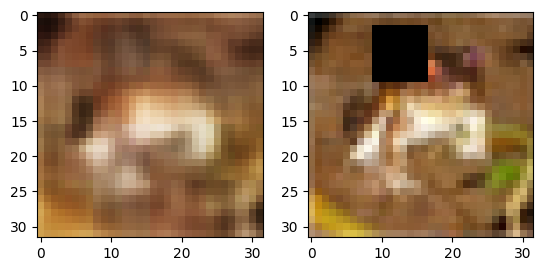

In [ ]:
plt.figure()

f, axarr = plt.subplots(1,2)

axarr[0].imshow(Image.open('DeepImageInpainting/src/data/temp/prediction.png'))
axarr[1].imshow(Image.open('DeepImageInpainting/src/data/temp/temp.png'))

## On unseend data

In [ ]:
!python DeepImageInpainting/src/predict_model.py vanilla_ae --image_path DeepImageInpainting/src/data/unseen/plane_1_masked.png

<Figure size 640x480 with 0 Axes>

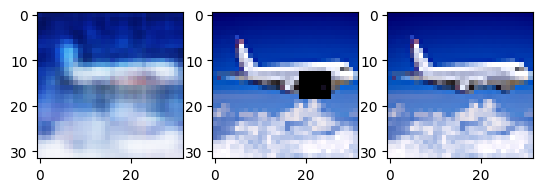

In [ ]:
plt.figure()

f, axarr = plt.subplots(1,3)

axarr[0].imshow(Image.open('DeepImageInpainting/src/data/temp/prediction.png'))
axarr[1].imshow(Image.open('DeepImageInpainting/src/data/unseen/plane_1_masked.png'))
axarr[2].imshow(Image.open('DeepImageInpainting/src/data/unseen/plane_1.png'))